<a href="https://colab.research.google.com/github/JHPark-git/Repo/blob/main/DACON_%EC%98%81%ED%99%94_%EA%B4%80%EA%B0%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 Tree model(One Hot Encoder)

In [ ]:
import pandas as pd
movie_train = pd.read_csv('/content/movies_train.csv')
movie_test = pd.read_csv('/content/movies_test.csv')
movie_train.shape

(600, 12)

In [ ]:
pd.DataFrame.head(movie_train)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


너무 많은 수의 제작사 > One Hot Encoder 사용시 데이터 크기가 너무 클 뿐 더러 상관관계가 저하될 우려 존재.

In [ ]:
import numpy as np
distributor = movie_train[['distributor']]
distributor.value_counts()
np.unique(distributor)

array(['(주) 브릿지웍스', '(주) 액티버스엔터테인먼트', '(주) 영화사조제', '(주) 영화제작전원사',
       '(주) 케이알씨지', '(주)JK필름', '(주)NEW', '(주)고앤고 필름', '(주)노버스엔터테인먼트',
       '(주)대명문화공장', '(주)더픽쳐스', '(주)두타연', '(주)드림팩트엔터테인먼트', '(주)랠리버튼',
       '(주)레인보우 팩토리', '(주)로드하우스', '(주)리틀빅픽처스', '(주)마운틴픽쳐스',
       '(주)마인스 엔터테인먼트', '(주)마인스엔터테인먼트', '(주)미디어데이', '(주)쇼박스', '(주)스마일이엔티',
       '(주)스톰픽쳐스코리아', '(주)시네마달', '(주)씨엠닉스', '(주)아우라픽처스', '(주)아이필름코퍼레이션',
       '(주)에이원 엔터테인먼트', '(주)엣나인필름', '(주)예지림 엔터테인먼트', '(주)온비즈넷',
       '(주)유비네트워크', '(주)유비콘텐츠', '(주)이스트스카이필름', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', '(주)팝엔터테인먼트', '(주)패뷸러스', '(주)패스파인더씨앤씨', '(주)프레인글로벌',
       '(주)피터팬픽쳐스', '(주)휘엔터테인먼트', 'BoXoo 엔터테인먼트', 'CGV 무비꼴라쥬',
       'CGV 아트하우스', 'CGV아트하우스', 'CJ CGV', 'CJ E&M Pictures',
       'CJ E&M 영화부문', 'CJ 엔터테인먼트', 'KBS미디어(주)', 'KT', 'KT&G 상상마당',
       'M2픽처스', 'NEW', 'OAL(올)', 'SBS콘텐츠허브', 'SK텔레콤(주)', 'SK플래닛',
       'THE 픽쳐스', 'tvN', 'ysfilm', '건시네마', '고구마공작소', '골든타이드픽처스', '김기덕 필름',
       '나우콘텐츠', '나이너스엔터테인먼트(주)', '노바엔터테인먼트', '더 

**pd.DataFrame.info()**: 데이터 정보 확인/null value 확인 > dir_prev_bfnum null value 존재(관객수가 알려지지 않은 경우)

In [ ]:
pd.DataFrame.info(movie_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
pd.DataFrame.info(movie_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
pd.DataFrame.describe(movie_train)

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


**pd.DataFrame.corr['col']**: target변수와의 상관관계 수치화 > 상관관계가 적은 변수를 제외하거나 변형.

In [ ]:
corr_matrix = movie_train.corr()

In [ ]:
corr_matrix['box_off_num'].sort_values()

num_actor         0.111179
dir_prev_num      0.259674
dir_prev_bfnum    0.283184
time              0.441452
num_staff         0.544265
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [ ]:
movie_train_set = movie_train.drop('box_off_num', axis=1)
movie_target = movie_train['box_off_num'].copy()

**sklearn.impute.SimpleImputer(starategy, fill_value)**: 결측치 대체

strategy: mean, median, most_frequent, constant

fill_value: 대체 방식이 constant일 때, 채워지는 value

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer.fit_transform(movie_train_set)


array([['개들의 전쟁', '롯데엔터테인먼트', '액션', ..., 0, 91, 2],
       ['내부자들', '(주)쇼박스', '느와르', ..., 2, 387, 3],
       ['은밀하게 위대하게', '(주)쇼박스', '액션', ..., 4, 343, 4],
       ...,
       ['살인의 강', '(주)마운틴픽쳐스', '공포', ..., 0, 123, 4],
       ['악의 연대기', 'CJ 엔터테인먼트', '느와르', ..., 0, 431, 4],
       ['베를린', 'CJ 엔터테인먼트', '액션', ..., 0, 363, 5]], dtype=object)

In [ ]:
movie_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 51.7+ KB


범주형 데이터 처리: 랭크가 없는 문자열 데이터를 0과1로 파싱해 인식.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

genre_train = movie_train_set[['genre']]
genre_encoded = encoder.fit_transform(genre_train)

screening_rat_train = movie_train_set[['screening_rat']]
screening_rat_encoded = encoder.fit_transform(screening_rat_train)

distributor_train = movie_train_set[['distributor']]
distributor_encoded = encoder.fit_transform(distributor_train)

In [ ]:
genre_encoded.shape

(600, 12)

In [ ]:
screening_rat_encoded.shape

(600, 4)

In [ ]:
genre_train.value_counts()

genre 
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
dtype: int64

In [ ]:
screening_rat_train.value_counts()

screening_rat
청소년 관람불가         204
15세 관람가          202
12세 관람가          102
전체 관람가            92
dtype: int64

In [ ]:
num_feature = ['time','dir_prev_num','num_staff','num_actor']
text_feature = ['genre','screening_rat']
target = ['box_off_num']
num_train, num_test = list(movie_train_set[num_feature]), list(movie_test[num_feature])
text_train, text_test = list(movie_train_set[text_feature]), list(movie_test[text_feature])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy= 'constant',fill_value=0)),
      ('mm_scaler', MinMaxScaler()),
])

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline1 = ColumnTransformer([
                ('num', num_pipeline, num_train),
                ('cat', OneHotEncoder(), text_train),
])

movie_train_prepared = full_pipeline1.fit_transform(movie_train_set)

In [ ]:
movie_train_prepared.shape

(600, 20)

In [ ]:
full_pipeline2 = ColumnTransformer([
                ('num', num_pipeline, num_test),
                ('cat', OneHotEncoder(), text_test),
])

movie_test_prepared = full_pipeline2.fit_transform(movie_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(movie_train_prepared, movie_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
num_prediction = lin_reg.predict(movie_train_prepared)
lin_mse = mean_squared_error(movie_target, num_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1491096.9592515712

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(movie_train_prepared, movie_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
movie_train_prepared.shape

(600, 20)

In [ ]:
movie_test_prepared.shape

(243, 20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf_reg = RandomForestRegressor()
rdf_reg.fit(movie_train_prepared, movie_target)

num_prediction = rdf_reg.predict(movie_train_prepared)
lin_mse = mean_squared_error(movie_target, num_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

570686.4102867491

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ext_reg = ExtraTreesRegressor()
ext_reg.fit(movie_train_prepared, movie_target)

num_prediction = ext_reg.predict(movie_train_prepared)
lin_mse = mean_squared_error(movie_target, num_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

11.518137870333033

In [ ]:
pred = rdf_reg.predict(movie_test_prepared)

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission['box_off_num'] = pred

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
!pip install dacon_submit_api-0.0.4-py3-none-any.whl

Processing ./dacon_submit_api-0.0.4-py3-none-any.whl


In [ ]:
from dacon_submit_api import dacon_submit_api
result = dacon_submit_api.post_submission_file(
    '/content/submission.csv',
    '5711e82411ea7664453e79326abb1c5edb70299534c286cfb2877394d8def967',
    '235536',
    'JHPark, 5th trial'
)

{'isSubmitted': True, 'detail': 'Success'}


#Ensemble

In [ ]:
import pandas as pd
train = pd.read_csv('/content/movies_train.csv')
test = pd.read_csv('/content/movies_test.csv')


In [ ]:
import re
train['distributor'] = train.distributor.str.replace('(주)','')
test['distributor'] = test.distributor.str.replace('(주)','')

train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]','',x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]','',x) for x in  test.distributor]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def get_dis(x):
  if 'CJ' in x or 'CGV' in x:
    return 'CJ'
  elif '쇼박스' in x:
    return '쇼박스'
  elif 'SK' in x:
    return 'SK'
  elif '스폰지' in x:
    return '스폰지'
  elif '리틀빅픽' in x:
    return '리틀빅픽처스'
  elif '싸이더스' in x:
    return '싸이더스'
  elif '마운틴픽' in x:
    return '마운틱픽처스'
  else:
    return x

In [ ]:
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)


In [ ]:
genre_dict={}
sorted_genre_list = train.groupby('genre').box_off_num.mean().sort_values().index
for i, genre in enumerate(sorted_genre_list):
  genre_dict[genre] = i+1

In [ ]:
genre_dict

{'SF': 10,
 '공포': 7,
 '느와르': 12,
 '다큐멘터리': 2,
 '드라마': 8,
 '멜로/로맨스': 5,
 '뮤지컬': 1,
 '미스터리': 6,
 '서스펜스': 3,
 '애니메이션': 4,
 '액션': 11,
 '코미디': 9}

In [ ]:
train['genre'] = train.genre.map(genre_dict)
test['genre'] = test.genre.map(genre_dict)

In [ ]:
distributor_dict={}
sorted_distributor_list = train.groupby('distributor').box_off_num.median().sort_values().index
for i, distributor in enumerate(sorted_distributor_list):
  distributor_dict[distributor] = i+1


In [ ]:
train['distributor'] = train.distributor.map(distributor_dict)
test['distributor'] = test.distributor.map(distributor_dict)

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year
0,개들의 전쟁,134,11,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012
1,내부자들,145,12,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015
2,은밀하게 위대하게,145,11,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013
3,나는 공무원이다,140,9,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012
4,불량남녀,145,9,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010


In [ ]:
train['release_year'] = train['release_time'].str.split('-').str[0]
train['release_year'] = train['release_year'].astype(int)
test['release_year'] = test['release_time'].str.split('-').str[0]
test['release_year'] = test['release_year'].astype(int)

In [ ]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [ ]:
train['box_off_num'] = np.log1p(train['box_off_num'])

In [ ]:
feature = ['distributor','genre','time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor','screening_rat']
target = train['box_off_num']
train = train[feature]        
test = test[feature]

In [ ]:
train = pd.get_dummies(columns=['screening_rat'], data = train)
test = pd.get_dummies(columns=['screening_rat'], data = test)

<BarContainer object of 17 artists>

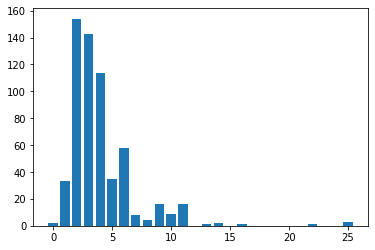

In [ ]:
import matplotlib.pyplot as plt
plt.bar(train['num_actor'].unique() ,train['num_actor'].value_counts())

In [ ]:
target.describe()


count    600.000000
mean       9.951971
std        3.315230
min        0.693147
25%        7.168772
50%        9.440782
75%       13.081305
max       16.473163
Name: box_off_num, dtype: float64

In [ ]:
import numpy as np
train['num_actor']= np.log1p(train['num_actor'])
test['num_actor']= np.log1p(test['num_actor'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distributor             600 non-null    int64  
 1   genre                   600 non-null    int64  
 2   time                    600 non-null    int64  
 3   dir_prev_bfnum          600 non-null    float64
 4   dir_prev_num            600 non-null    int64  
 5   num_staff               600 non-null    int64  
 6   num_actor               600 non-null    float64
 7   screening_rat_12세 관람가   600 non-null    uint8  
 8   screening_rat_15세 관람가   600 non-null    uint8  
 9   screening_rat_전체 관람가    600 non-null    uint8  
 10  screening_rat_청소년 관람불가  600 non-null    uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 35.3 KB


In [ ]:
corr_matrix = train.corr()
corr_matrix['box_off_num'].sort_values()

In [ ]:
pip install catboost


     |████████████████████████████████| 76.6 MB 55 kB/s 


In [ ]:
pip install ngboost


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

In [ ]:
kf = KFold(n_splits = 10, shuffle = True, random_state=1)


In [ ]:
gbr = GradientBoostingRegressor(random_state=2)
rmse_list = []
gbr_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(train, target):
  tr_x, tr_y = train.iloc[tr_idx], target.iloc[tr_idx]
  val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]

  gbr.fit(tr_x, tr_y)

  pred = np.expm1([0 if y<0 else y for y in gbr.predict(val_x)])
  sub_pred = np.expm1([0 if y<0 else y for y in gbr.predict(test)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))

  rmse_list.append(rmse)

  gbr_pred += (sub_pred /10)


In [ ]:
np.mean(rmse_list)

1118672.0747289346

In [ ]:
ngb = NGBRegressor(random_state = 518)

In [ ]:
rmse_list = []
ngb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(train, target) :
    tr_x, tr_y = train.iloc[tr_idx], target.iloc[tr_idx]
    val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if y < 0 else y for y in ngb.predict(val_x)])
    sub_pred = np.expm1([0 if y < 0 else y for y in ngb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    ngb_pred += (sub_pred / 10)

[iter 0] loss=1.3443 val_loss=0.0000 scale=1.0000 norm=1.0126
[iter 100] loss=1.3108 val_loss=0.0000 scale=0.2500 norm=0.2491
[iter 200] loss=1.2770 val_loss=0.0000 scale=1.0000 norm=0.9805
[iter 300] loss=1.2416 val_loss=0.0000 scale=1.0000 norm=0.9631
[iter 400] loss=1.2116 val_loss=0.0000 scale=0.5000 norm=0.4740
[iter 0] loss=1.2918 val_loss=0.0000 scale=1.0000 norm=1.0314
[iter 100] loss=1.1894 val_loss=0.0000 scale=1.0000 norm=0.9375
[iter 200] loss=1.1828 val_loss=0.0000 scale=0.0312 norm=0.0292
[iter 300] loss=1.1819 val_loss=0.0000 scale=0.0078 norm=0.0073
[iter 400] loss=1.1817 val_loss=0.0000 scale=0.0020 norm=0.0018
[iter 0] loss=1.1867 val_loss=0.0000 scale=0.5000 norm=0.4671
[iter 100] loss=1.1545 val_loss=0.0000 scale=0.5000 norm=0.4526
[iter 200] loss=1.1367 val_loss=0.0000 scale=0.0156 norm=0.0140
[iter 300] loss=1.1357 val_loss=0.0000 scale=0.0039 norm=0.0035
[iter 400] loss=1.1354 val_loss=0.0000 scale=0.0020 norm=0.0017
[iter 0] loss=1.1509 val_loss=0.0000 scale=0.5

In [ ]:
np.mean(rmse_list)

1299480.332367676

In [ ]:
lgbm = LGBMRegressor(random_state = 43)

In [ ]:
rmse_list = []
lgbm_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(train, target) :
    tr_x, tr_y = train.iloc[tr_idx], target.iloc[tr_idx]
    val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if y < 0 else y for y in ngb.predict(val_x)])
    sub_pred = np.expm1([0 if y < 0 else y for y in ngb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgbm_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

1376931.6500214536

In [ ]:
cat = CatBoostRegressor(random_state = 518, silent = True)

In [ ]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(train, target) :
    tr_x, tr_y = train.iloc[tr_idx], target.iloc[tr_idx]
    val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if y < 0 else y for y in ngb.predict(val_x)])
    sub_pred = np.expm1([0 if y < 0 else y for y in ngb.predict(test)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

1376931.6500214536

In [ ]:
submission = pd.read_csv('/content/submission.csv')

In [ ]:
submission['box_off_num'] = (cat_pred + lgbm_pred  + gbr_pred + ngb_pred) / 4
submission

,title,box_off_num
0,용서는 없다,1.066325e+06
1,아빠가 여자를 좋아해,2.300947e+06
2,하모니,1.718287e+06
3,의형제,3.265156e+06
4,평행 이론,1.457170e+06
...,...,...
238,해에게서 소년에게,9.477557e+03
239,울보 권투부,3.701546e+03
240,어떤살인,2.430138e+01
241,말하지 못한 비밀,1.618238e+03
